In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 10.4 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path_img = "/content/drive/MyDrive/annotated dataset/train/images"
train_path_label = "/content/drive/MyDrive/annotated dataset/train/labels"
val_path_img = "/content/drive/MyDrive/annotated dataset/valid/images"
val_path_label = "/content/drive/MyDrive/annotated dataset/valid/labels"
test_path = "/content/drive/MyDrive/annotated dataset/test/images"

In [ ]:
!ls /content/drive/MyDrive

In [ ]:
from google.colab import drive
drive.flush_and_unmount()


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8/Dataset/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 2193 images---


  0%|          | 0/1755 [00:00<?, ?it/s]

------ Training data created with 80% split 1755 images -------


  0%|          | 0/438 [00:00<?, ?it/s]

------ Testing data created with a total of 438 images ----------
------ TASK COMPLETED -------


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8/data.yaml epochs=1 imgsz=640 batch=3 project=/content/drive/MyDrive/yolov8/training_results name=result_1epoch

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/data.yaml, epochs=1, patience=50, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=result_1epoch, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8/data.yaml epochs=8 imgsz=640 batch=3 project=/content/drive/MyDrive/yolov8/training_results name=result_8epoch


Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/data.yaml, epochs=8, patience=50, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=result_8epoch, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8/data.yaml epochs=1 imgsz=640 batch=3 project=/content/drive/MyDrive/yolov8/training_results name=result_2epoch


Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolov8/data.yaml, epochs=1, patience=50, batch=3, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=result_2epoch, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/result_30epoch/weights/best.pt conf=0.55 source=/content/drive/MyDrive/yolov8/test_images


Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/203 /content/drive/MyDrive/yolov8/test_images/00005_jpg.rf.9f43b17a934d97c72d07d4ca38e167c5 (1).jpg: 640x640 (no detections), 16.4ms
image 2/203 /content/drive/MyDrive/yolov8/test_images/00005_jpg.rf.9f43b17a934d97c72d07d4ca38e167c5.jpg: 640x640 (no detections), 16.3ms
image 3/203 /content/drive/MyDrive/yolov8/test_images/00006_jpg.rf.67273dfbd2e6a4195302190094ac27f0 (1).jpg: 640x640 (no detections), 16.4ms
image 4/203 /content/drive/MyDrive/yolov8/test_images/00006_jpg.rf.67273dfbd2e6a4195302190094ac27f0.jpg: 640x640 (no detections), 16.3ms
image 5/203 /content/drive/MyDrive/yolov8/test_images/00007_jpg.rf.d0f8ba7322d211c8f2dcad225f09215f (1).jpg: 640x640 1 Crack, 16.3ms
image 6/203 /content/drive/MyDrive/yolov8/test_images/00007_jpg.rf.d0f8ba7322d211c8f2dcad225f09215f.jpg: 640x640 1 Crack, 16.3ms
image 7/203 /content/driv

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8/output_30epoch

F1 Confidence Curve:


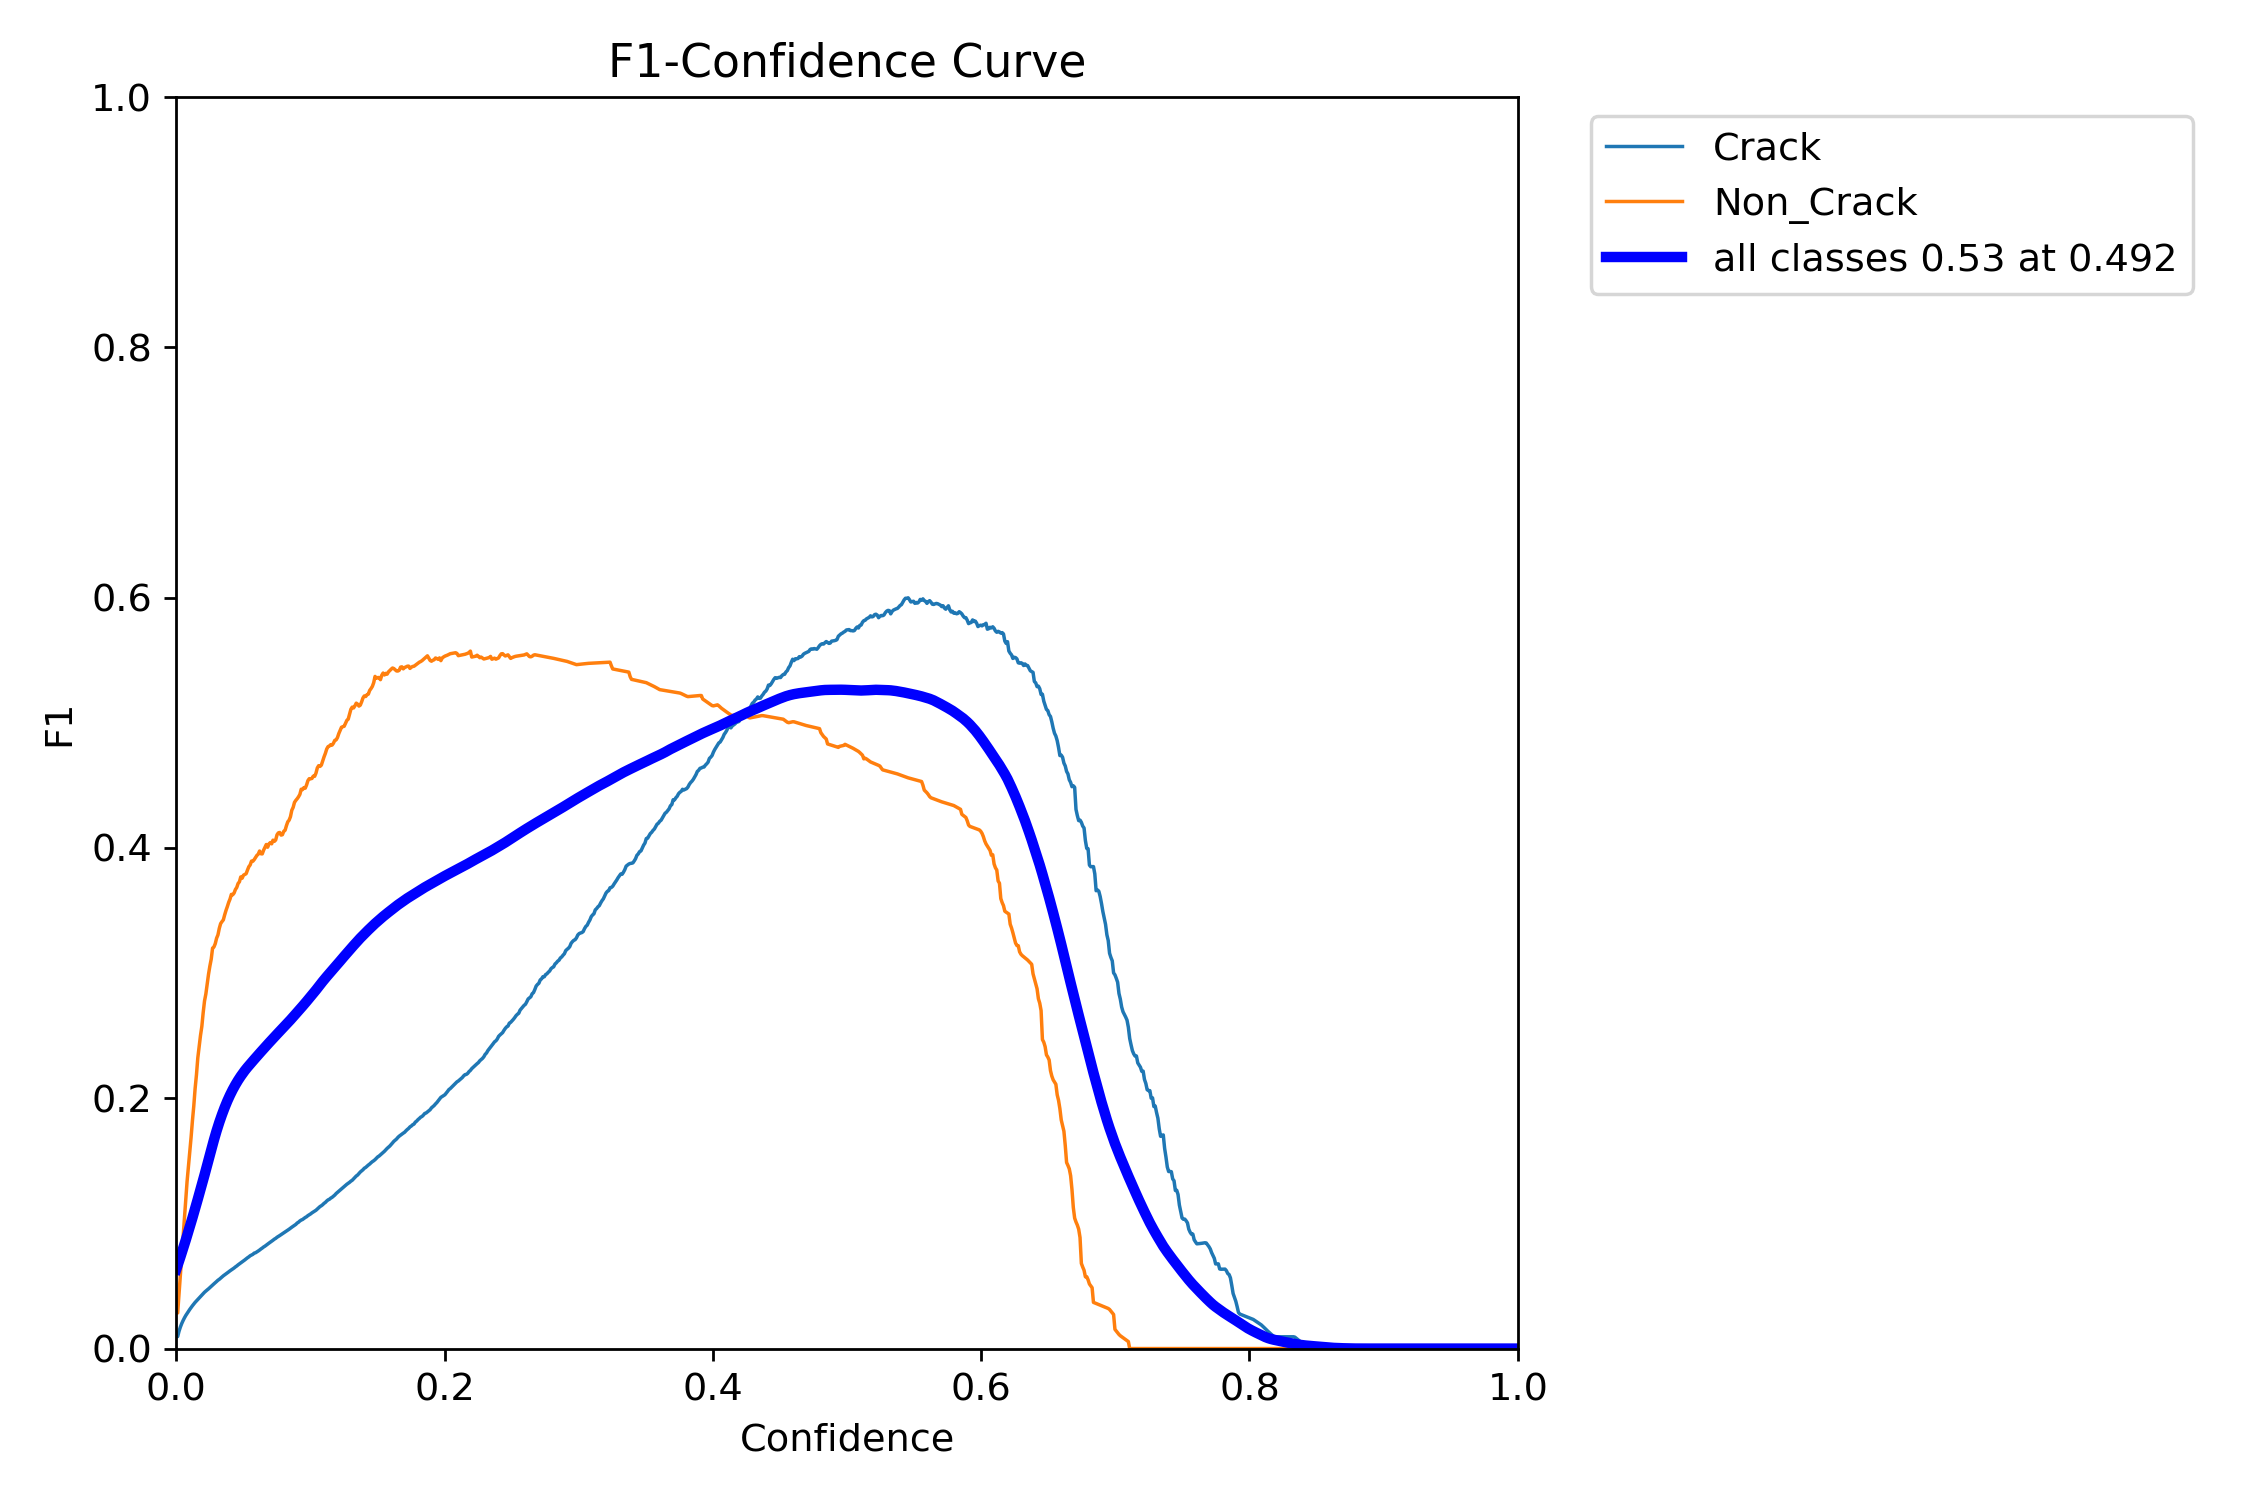

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/F1_curve.png'
img = Image.open(image_path)
print('F1 Confidence Curve:')
# Display the image using IPython.display
display(img)

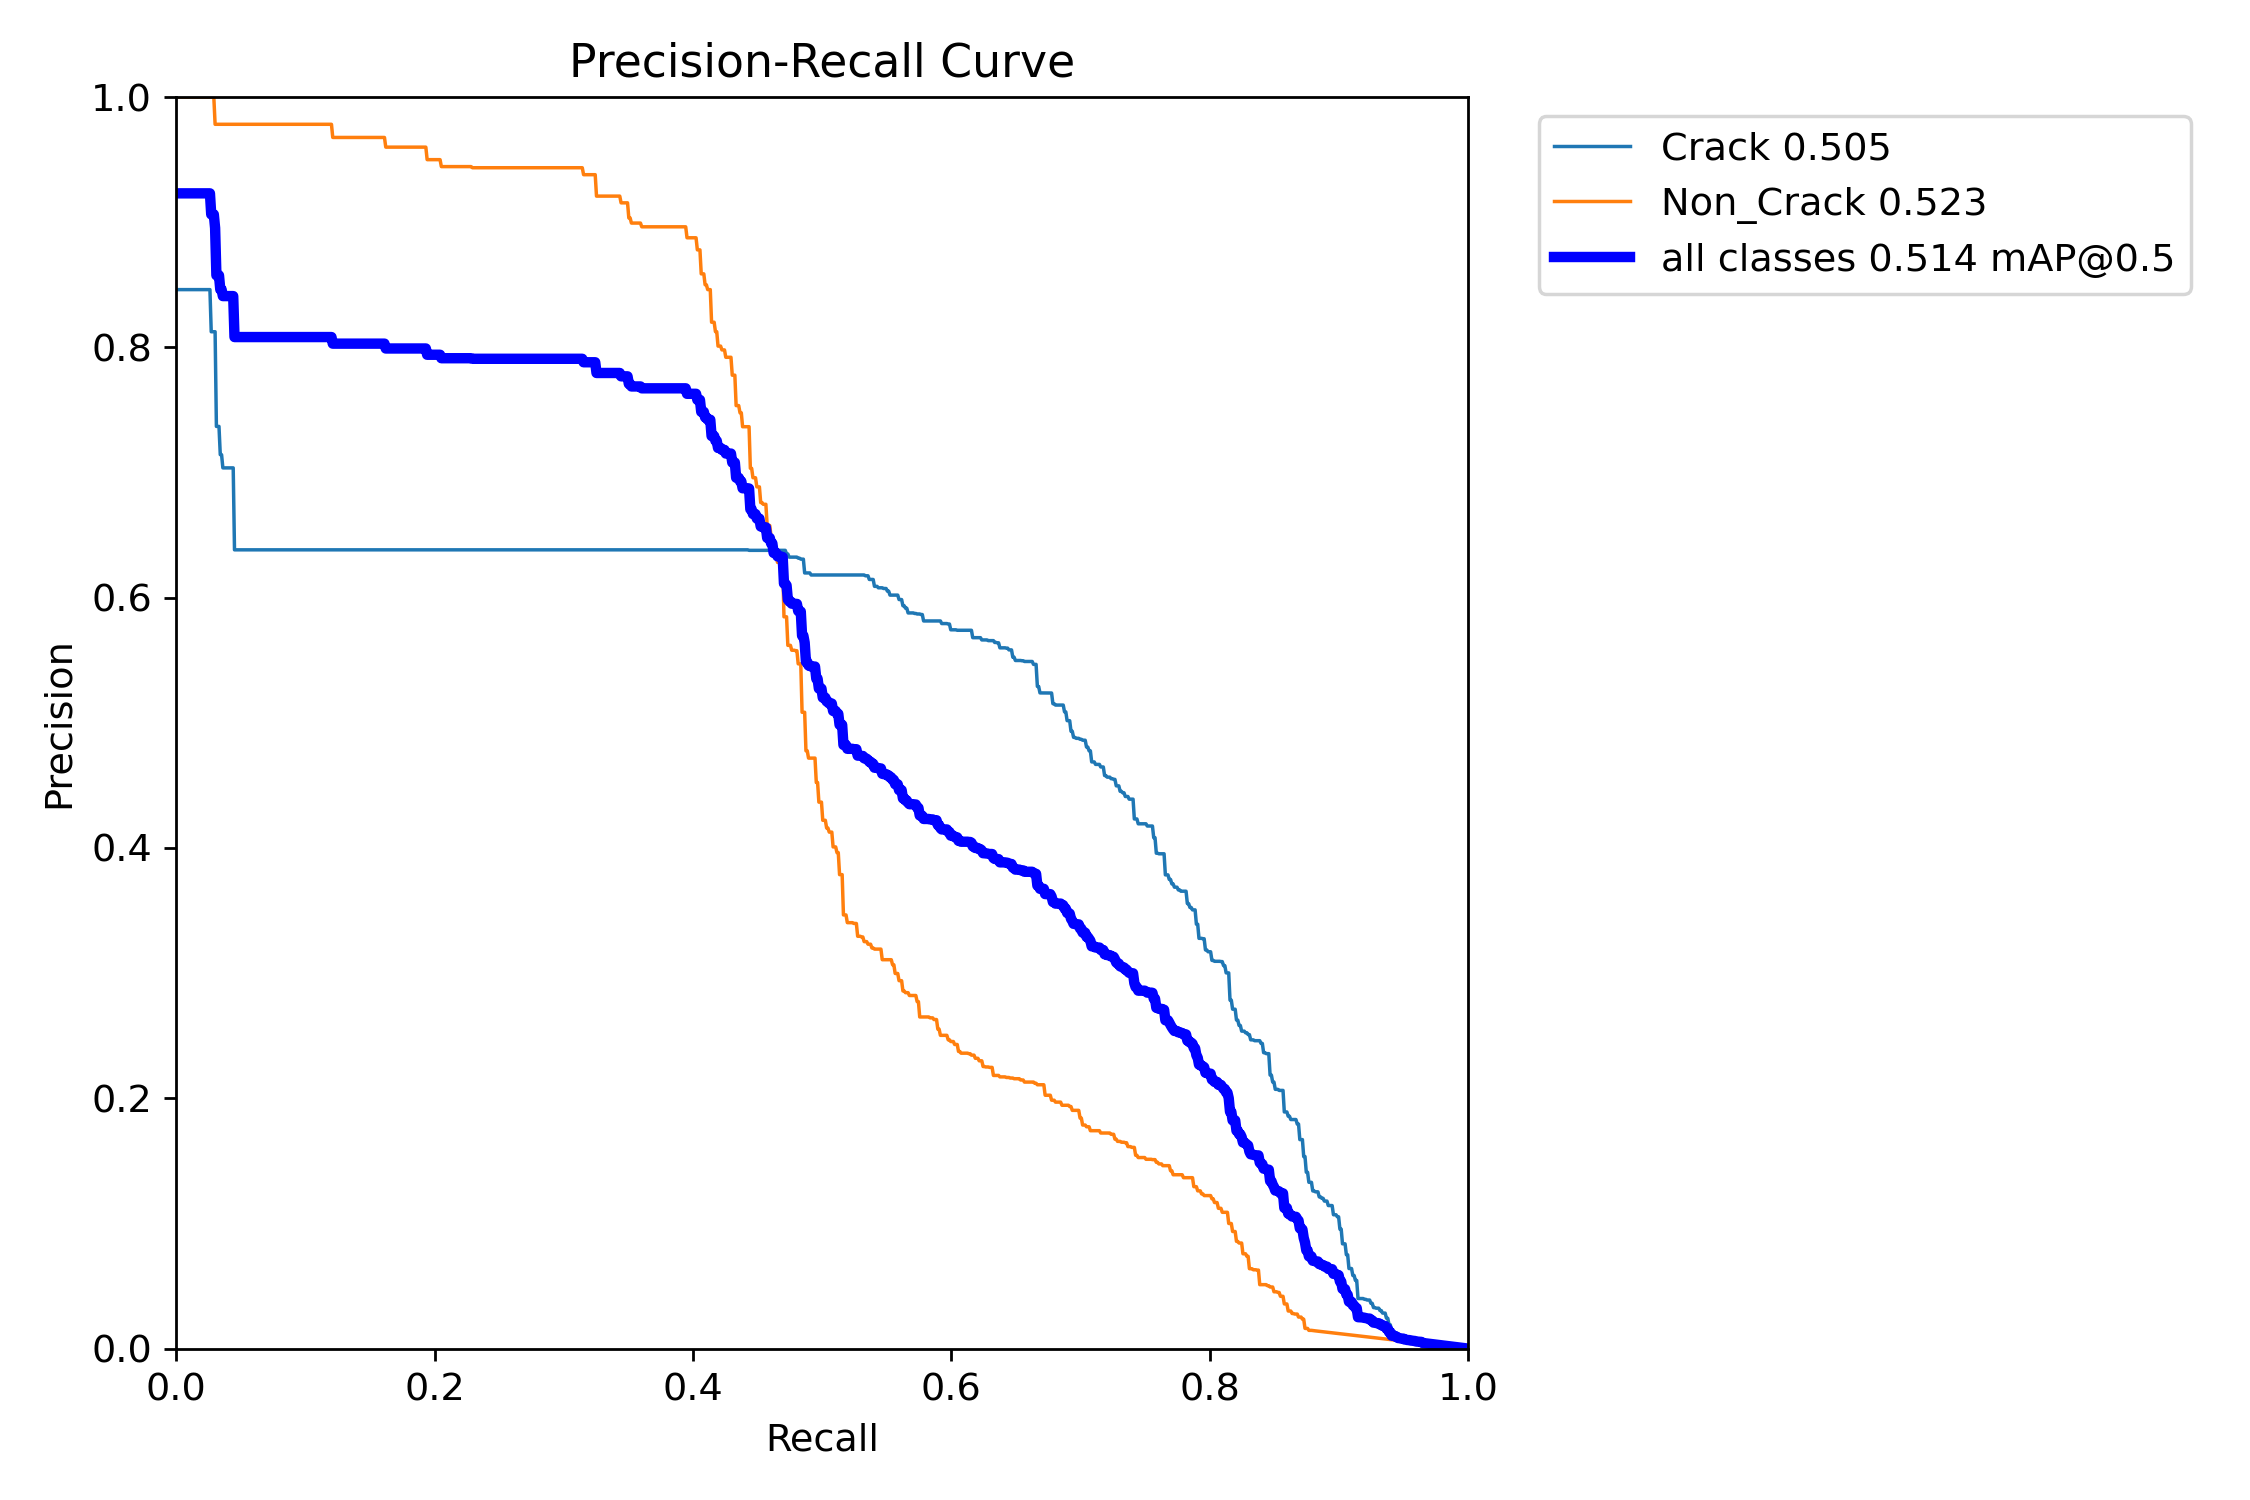

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/PR_curve.png'
img = Image.open(image_path)
# Display the image using IPython.display
display(img)

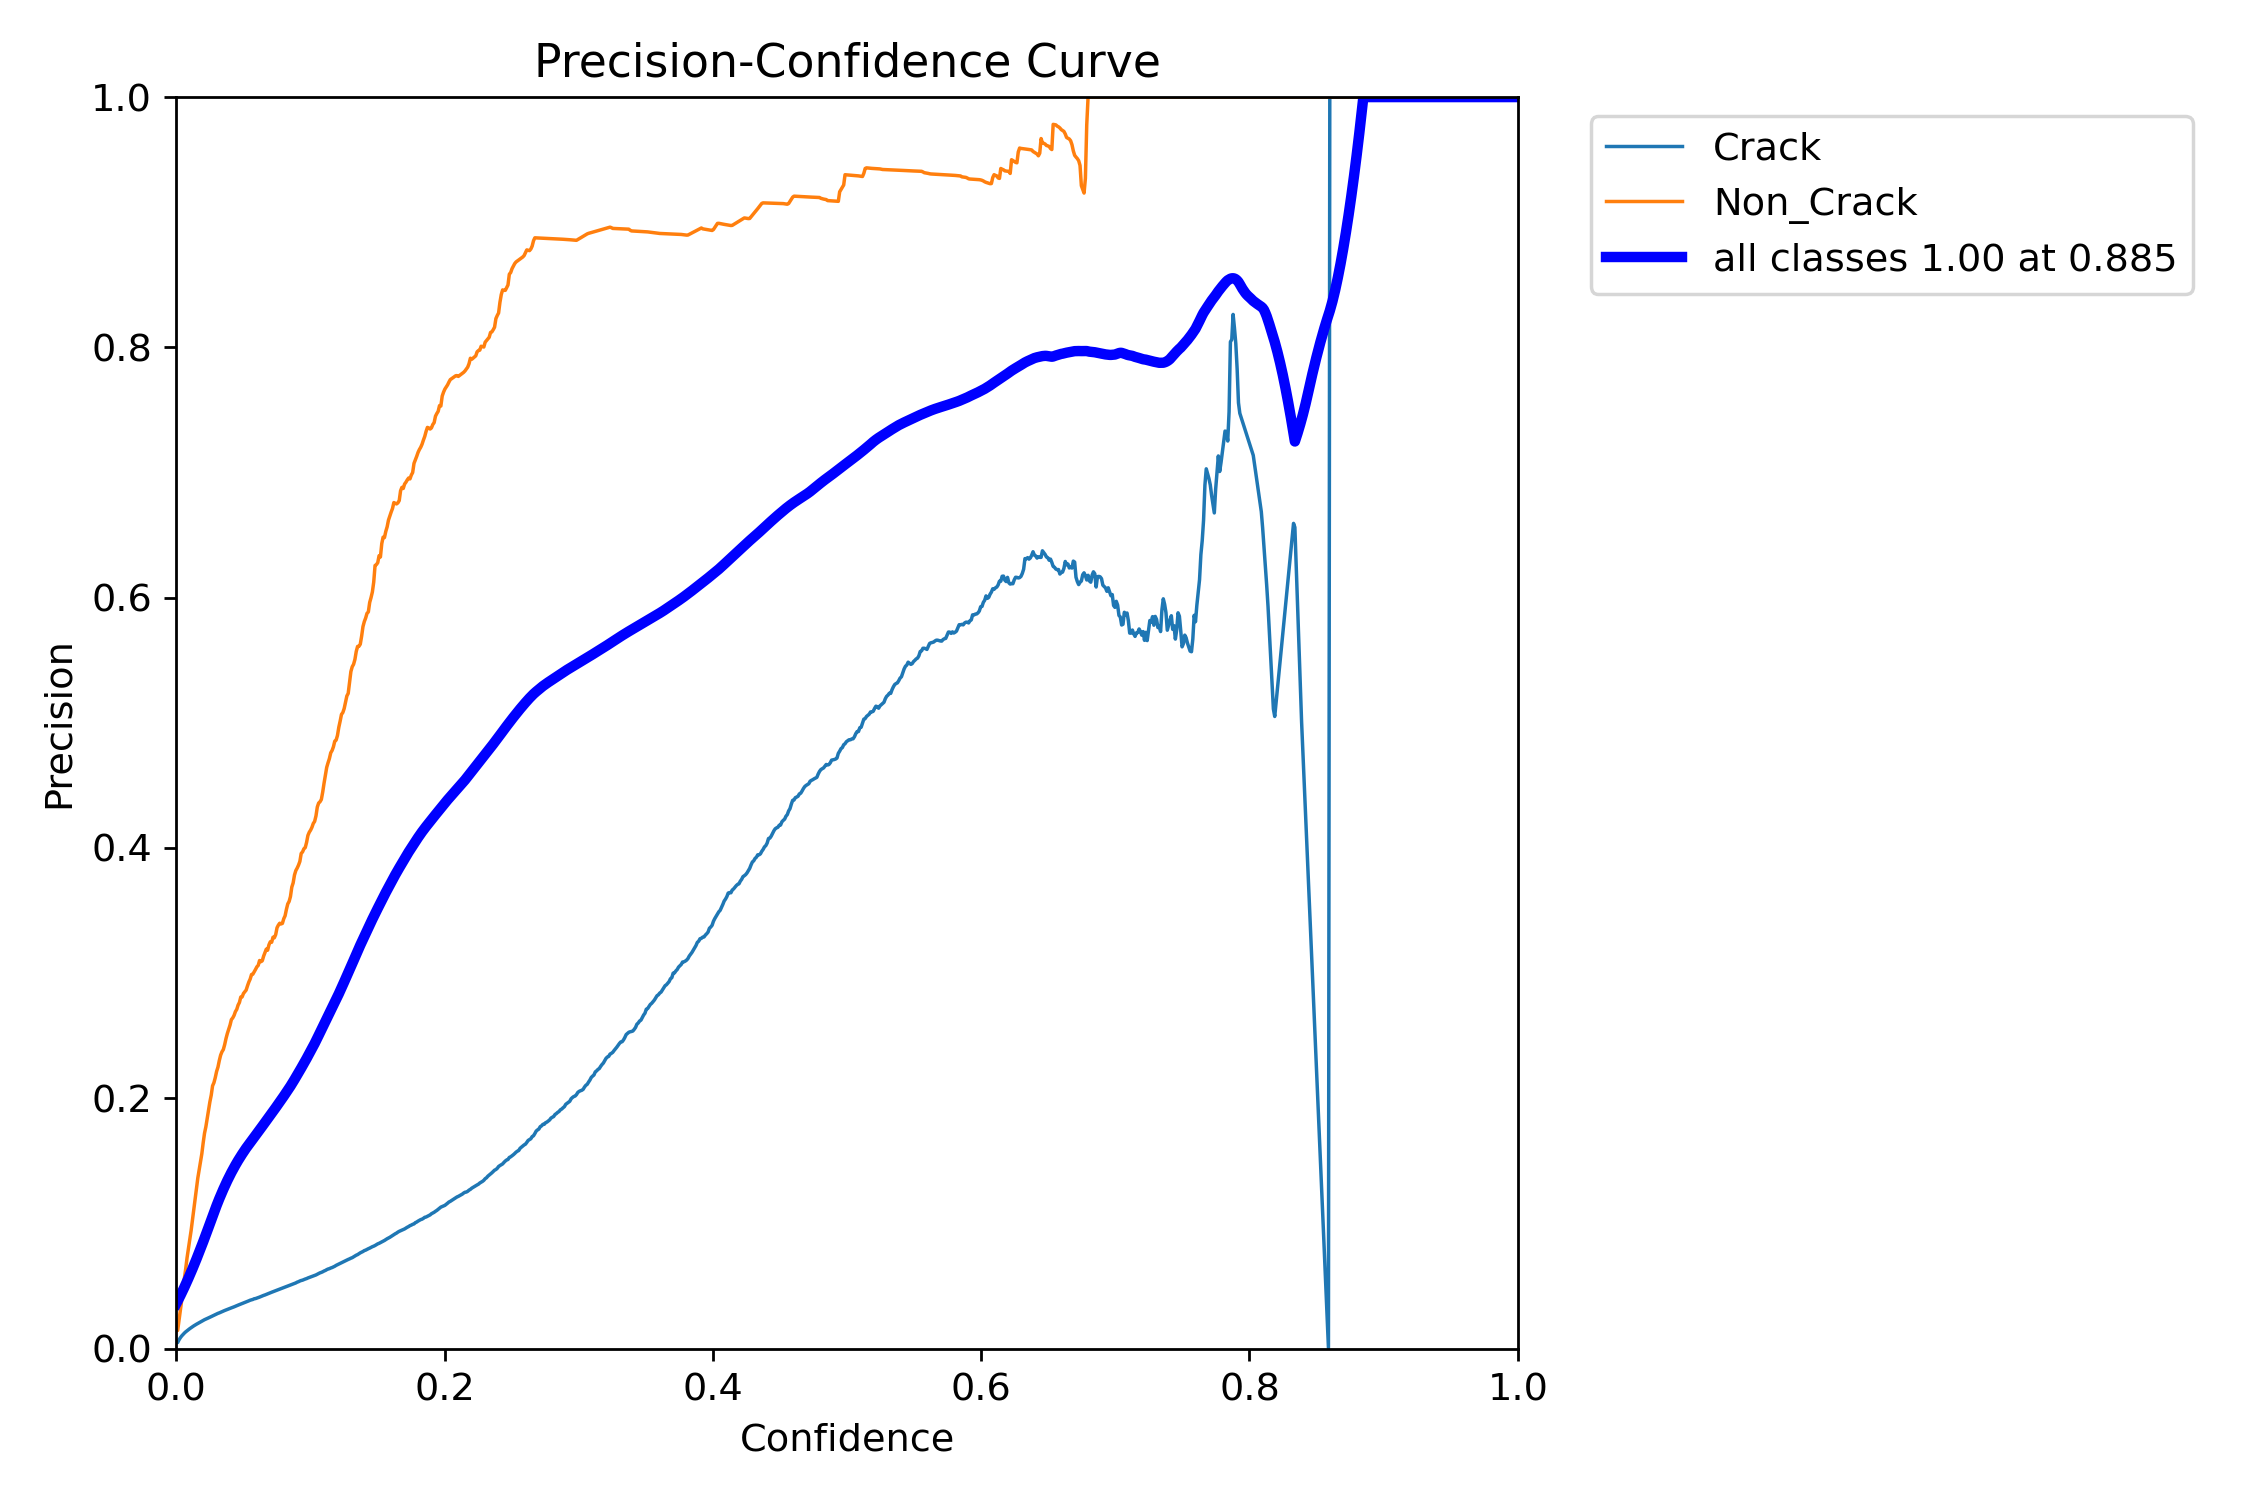

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/P_curve.png'
img = Image.open(image_path)
# Display the image using IPython.display
display(img)

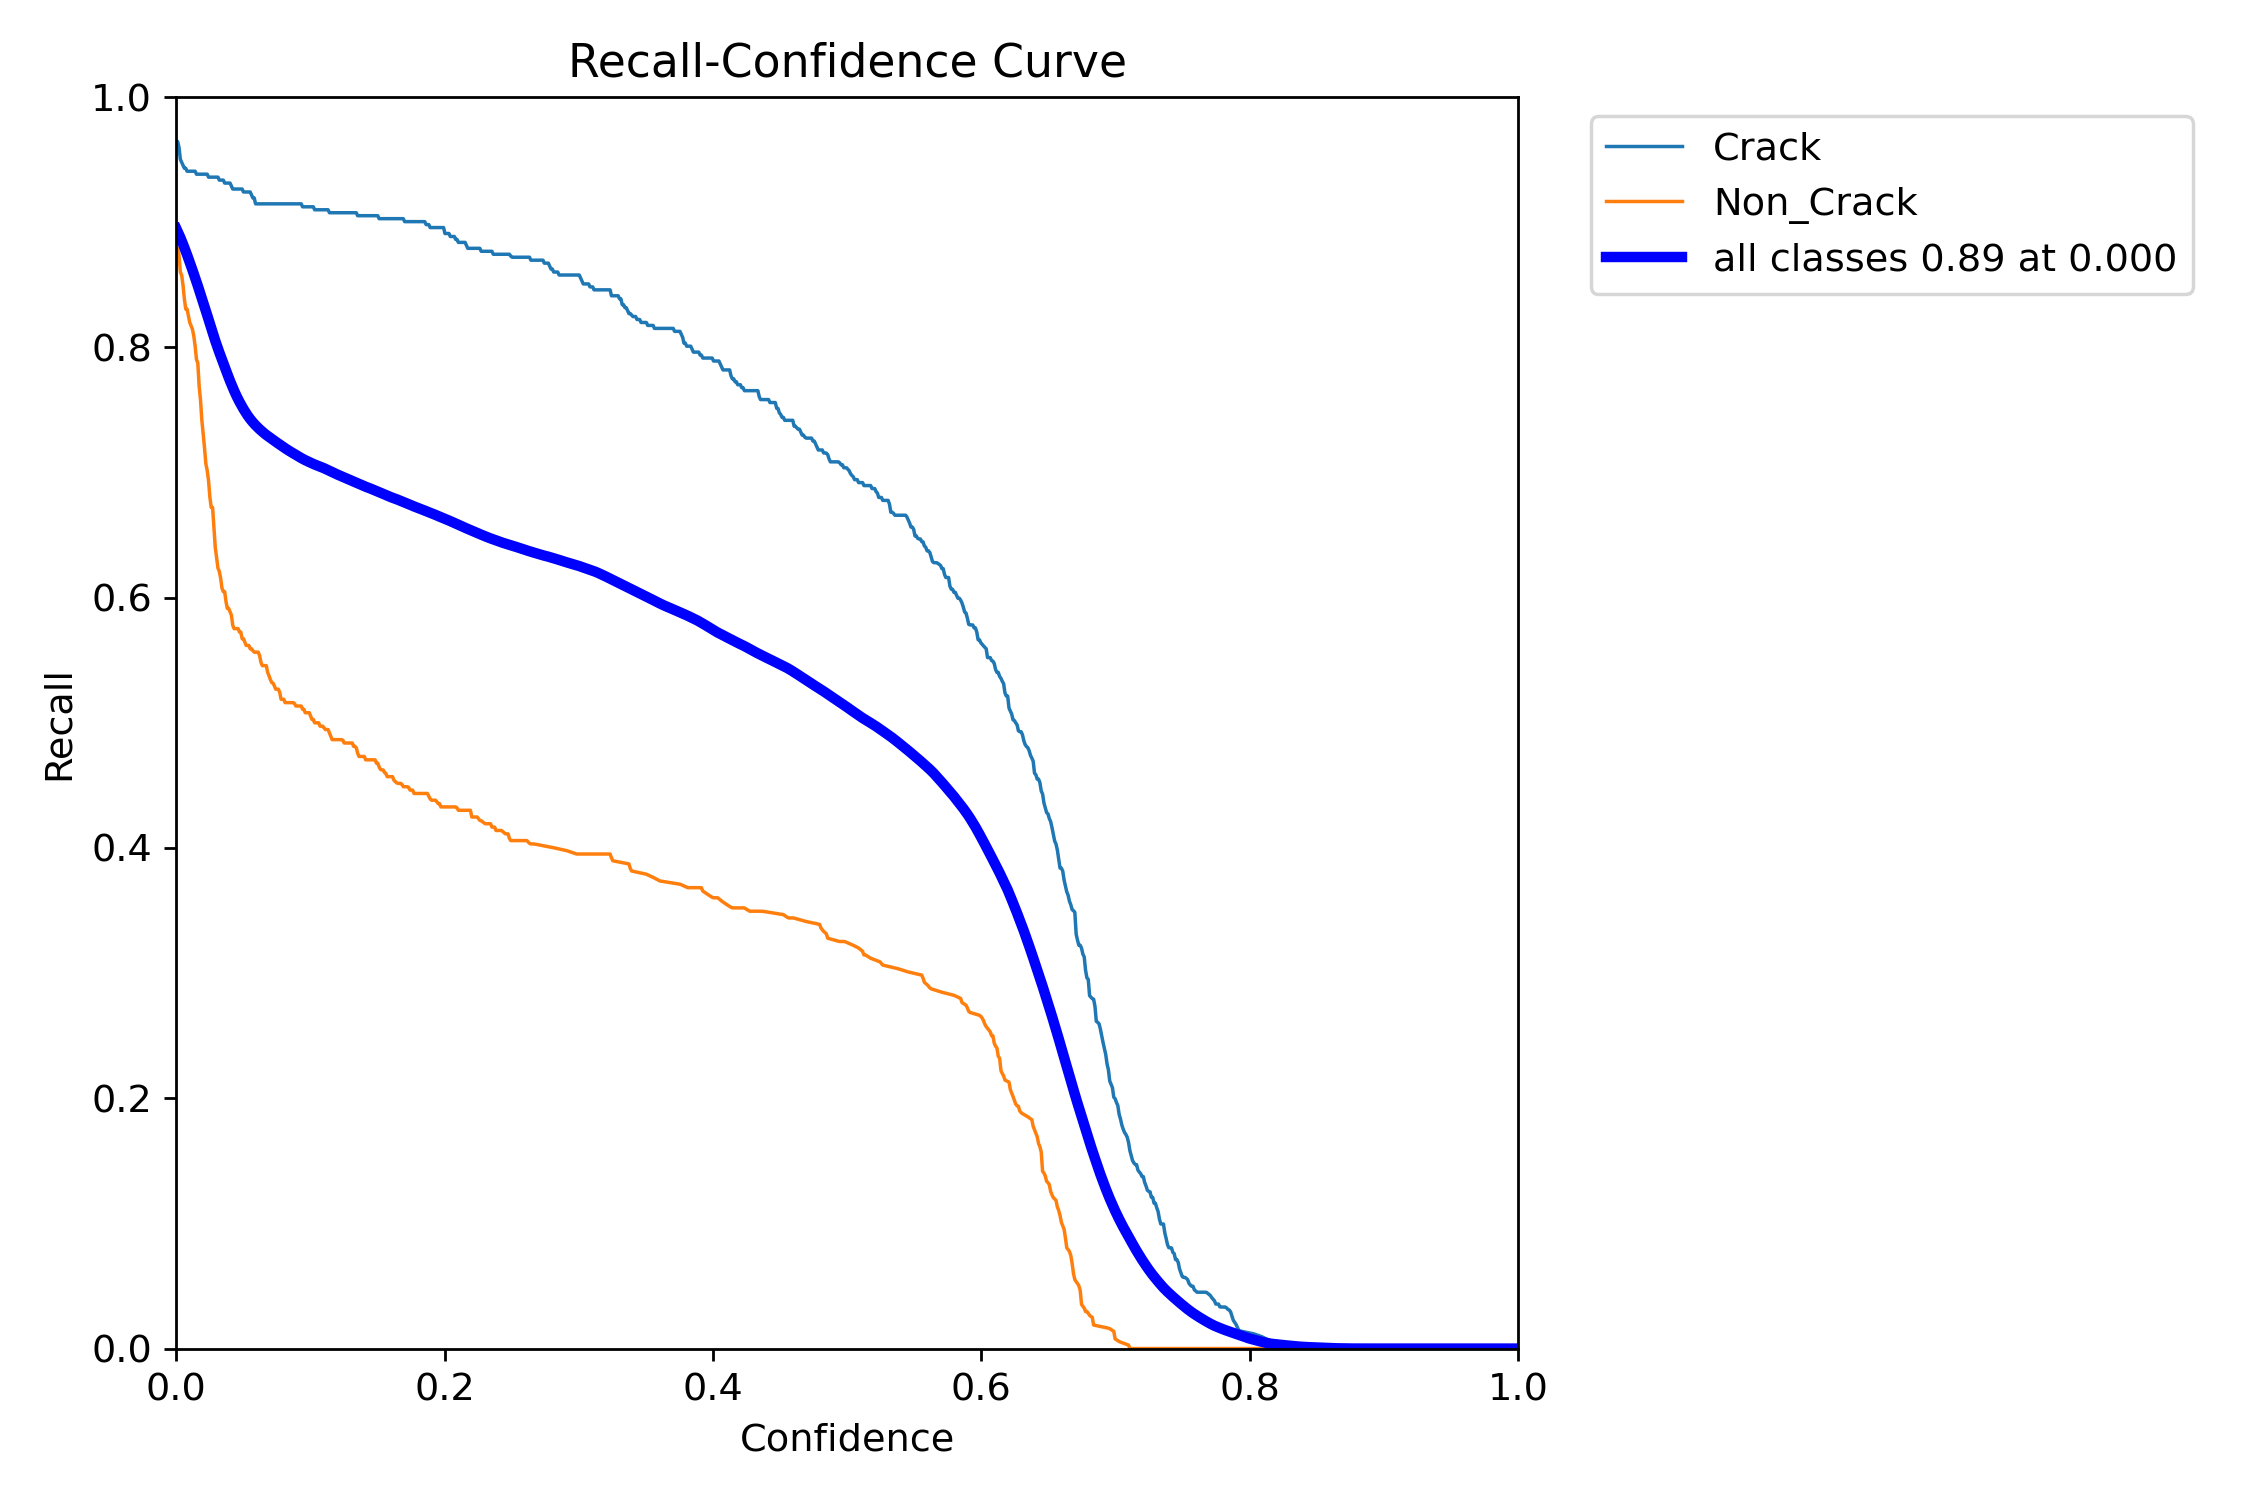

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/R_curve.png'
img = Image.open(image_path)
# Display the image using IPython.display
display(img)

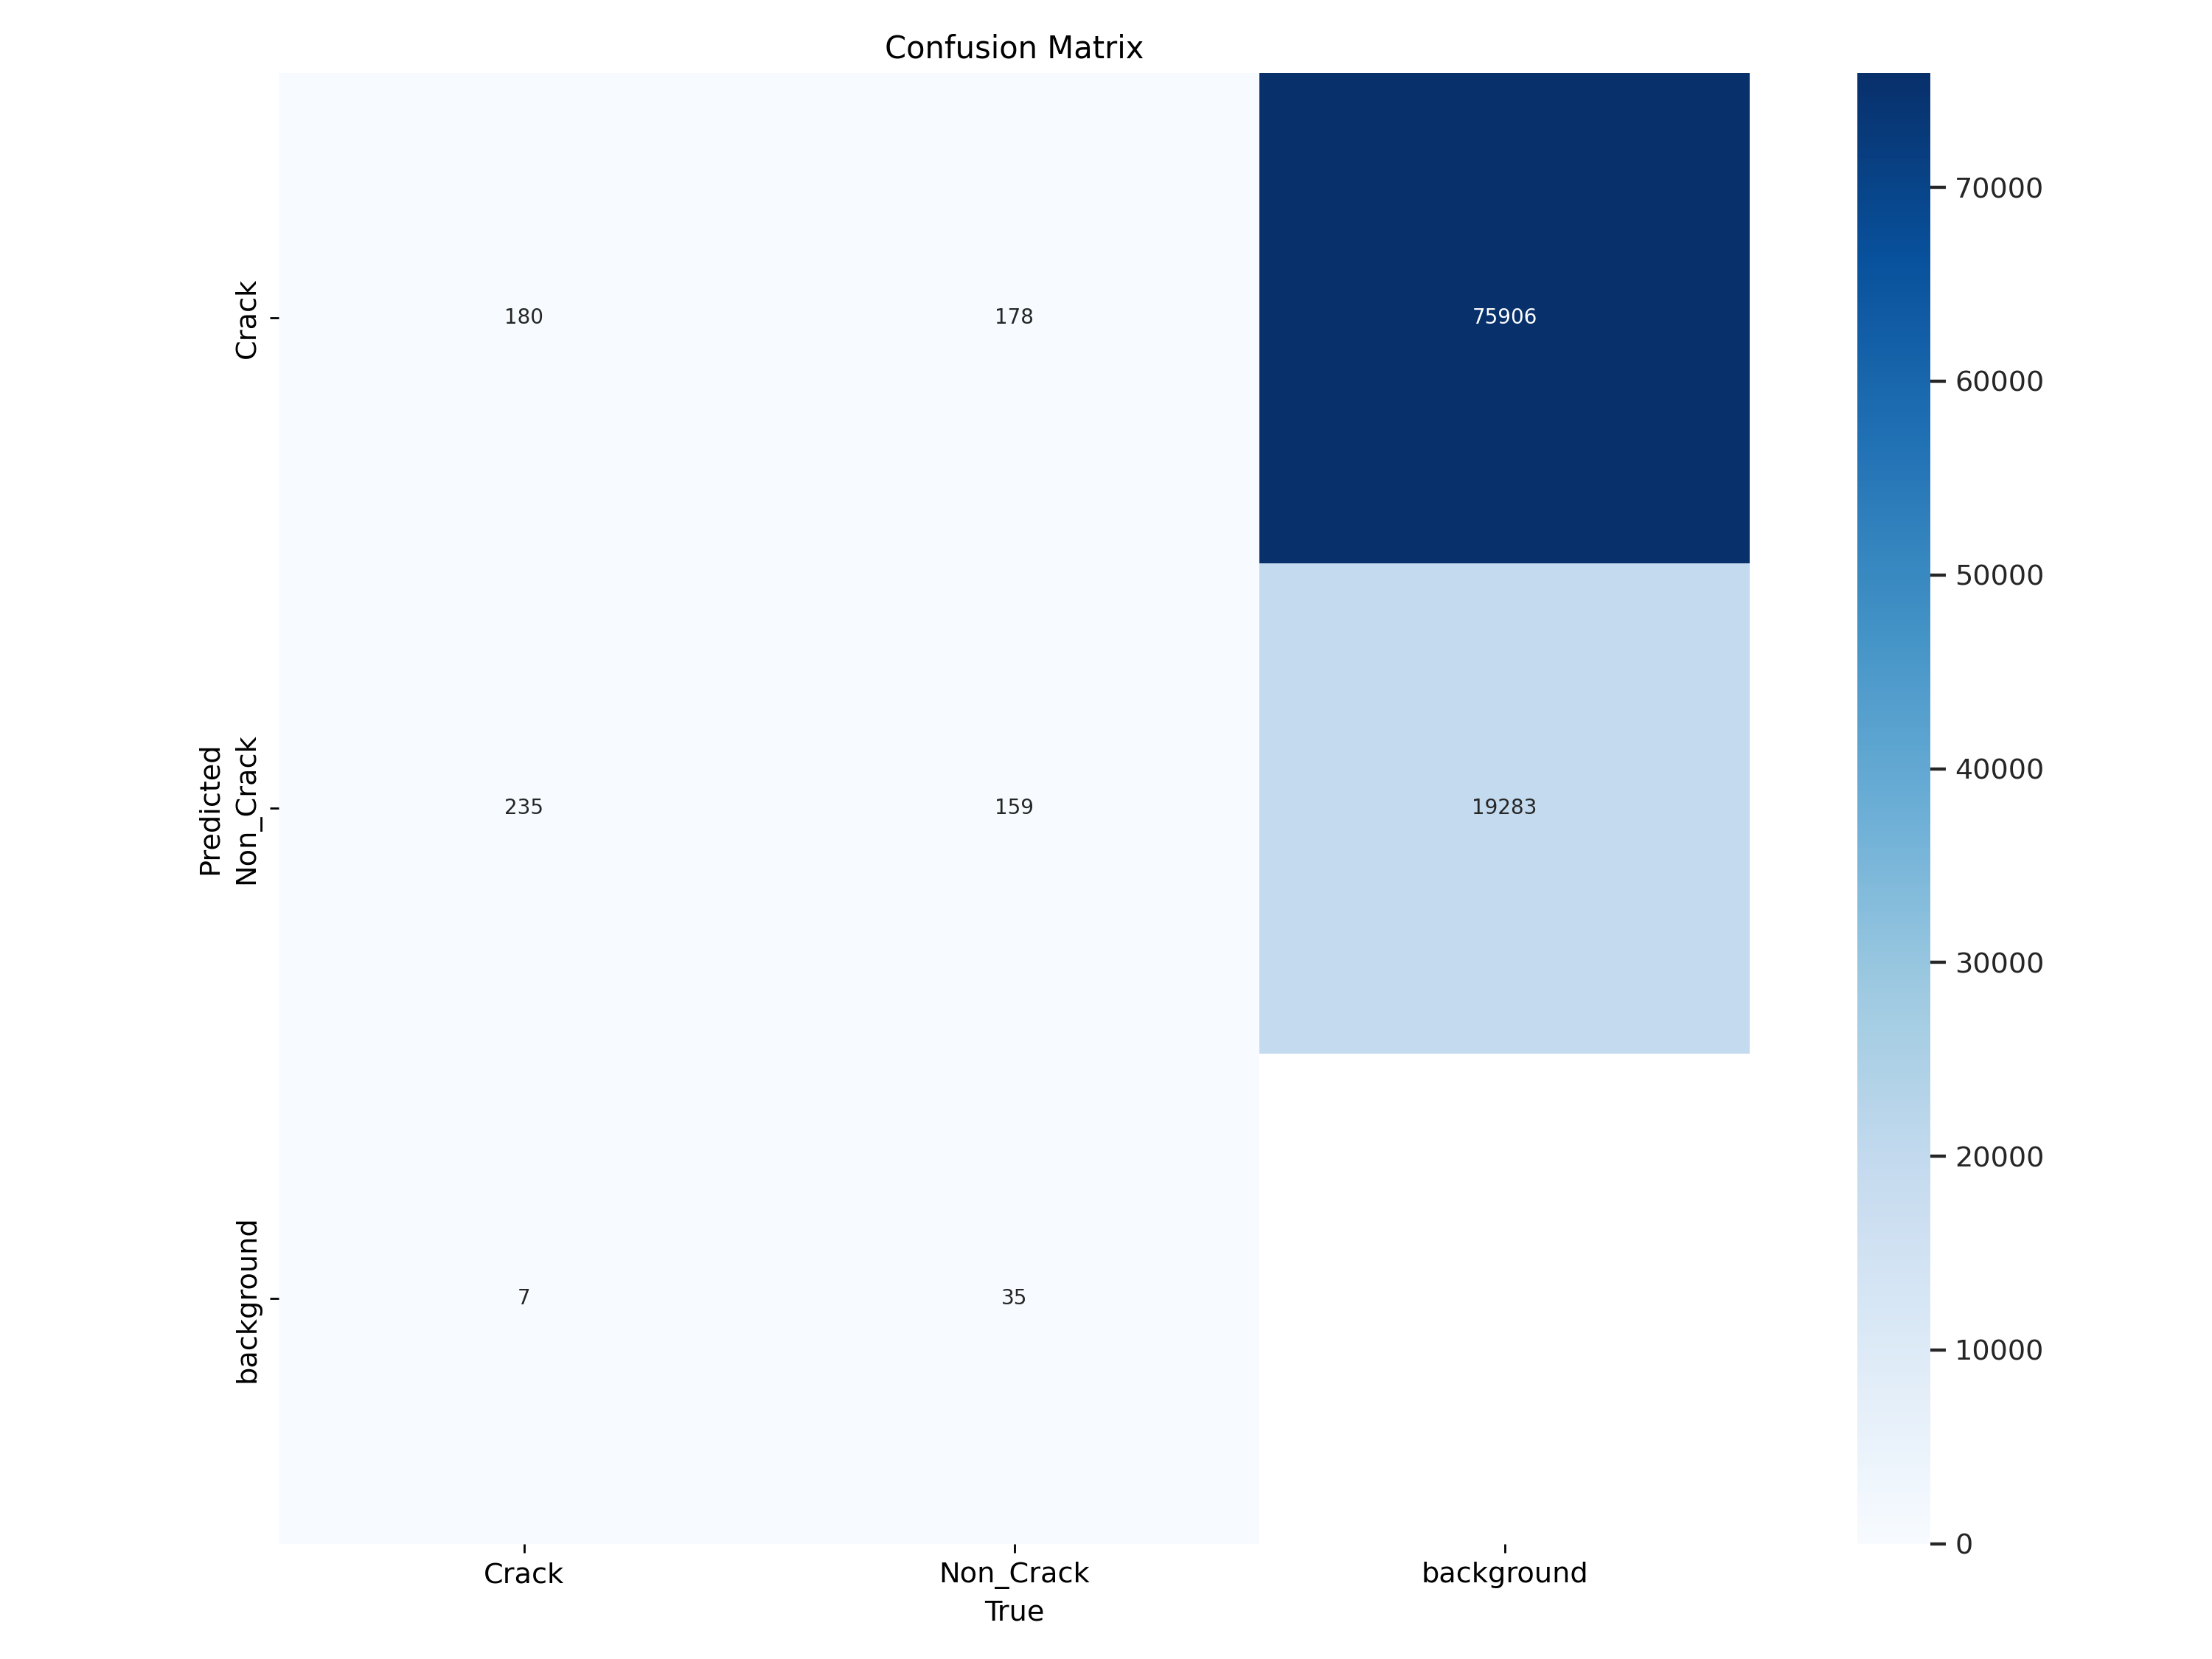

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/confusion_matrix.png'
img = Image.open(image_path)
# Display the image using IPython.display
display(img)

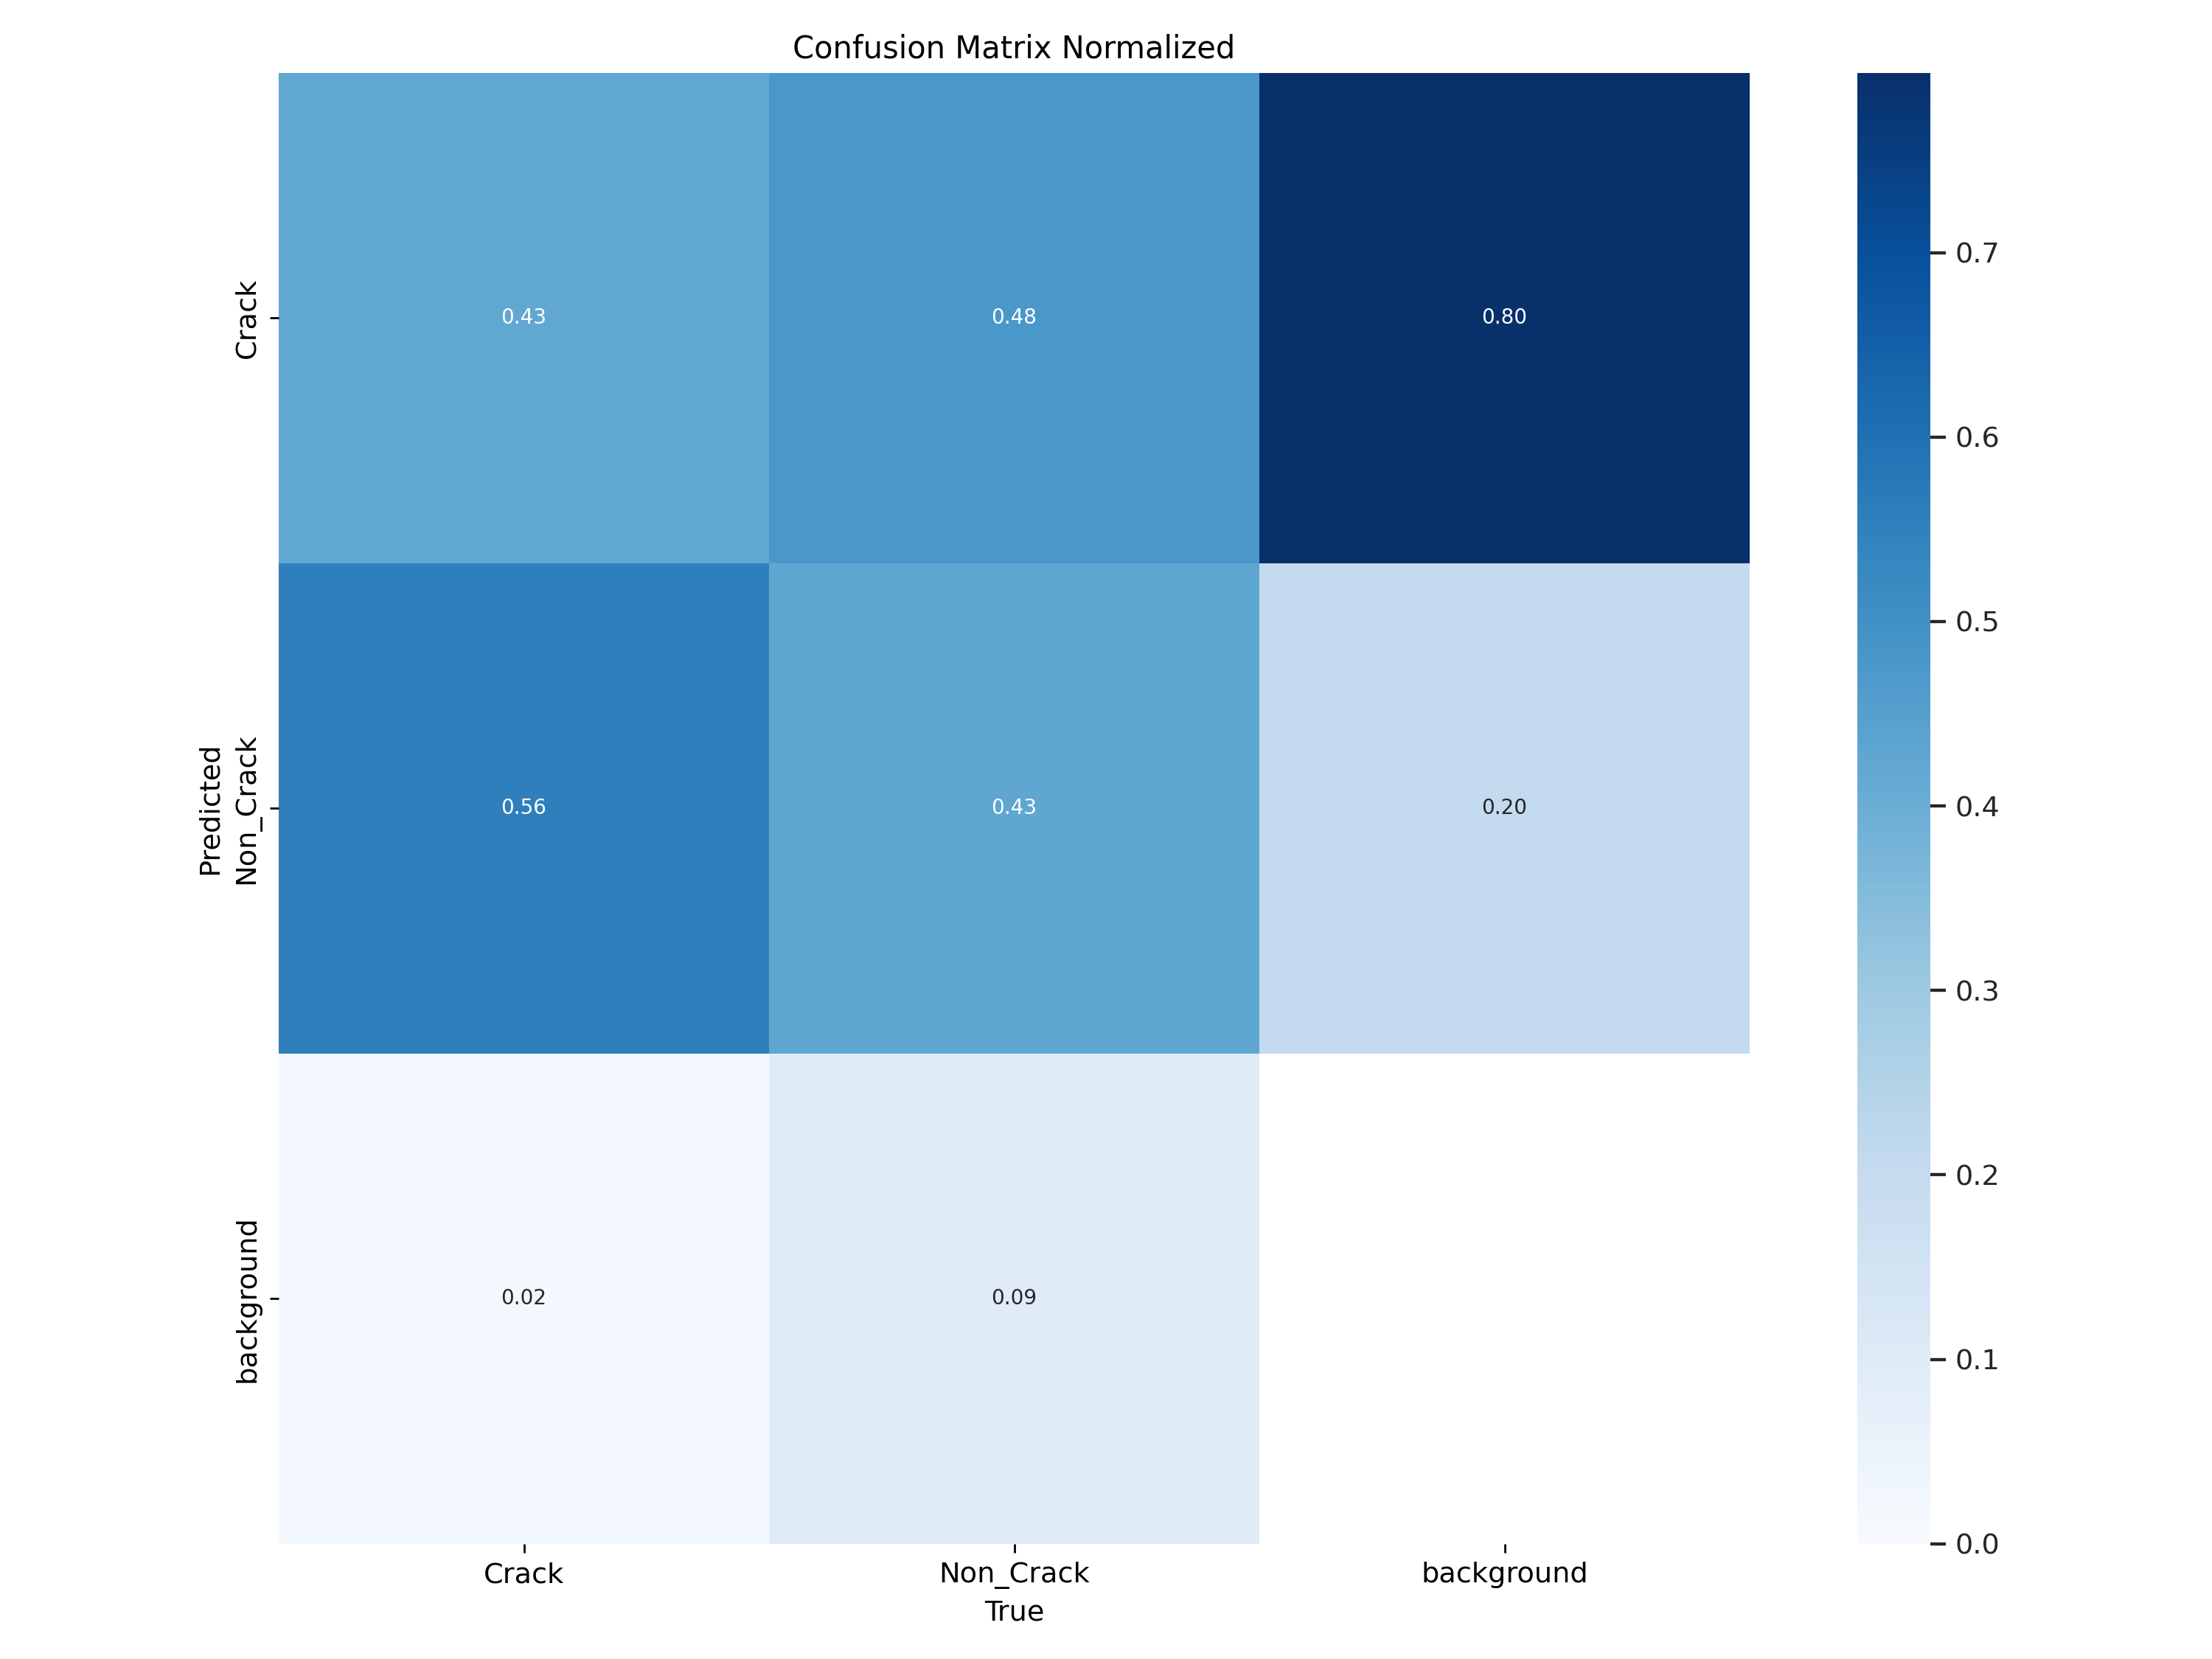

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/confusion_matrix_normalized.png'
img = Image.open(image_path)
# Display the image using IPython.display
display(img)

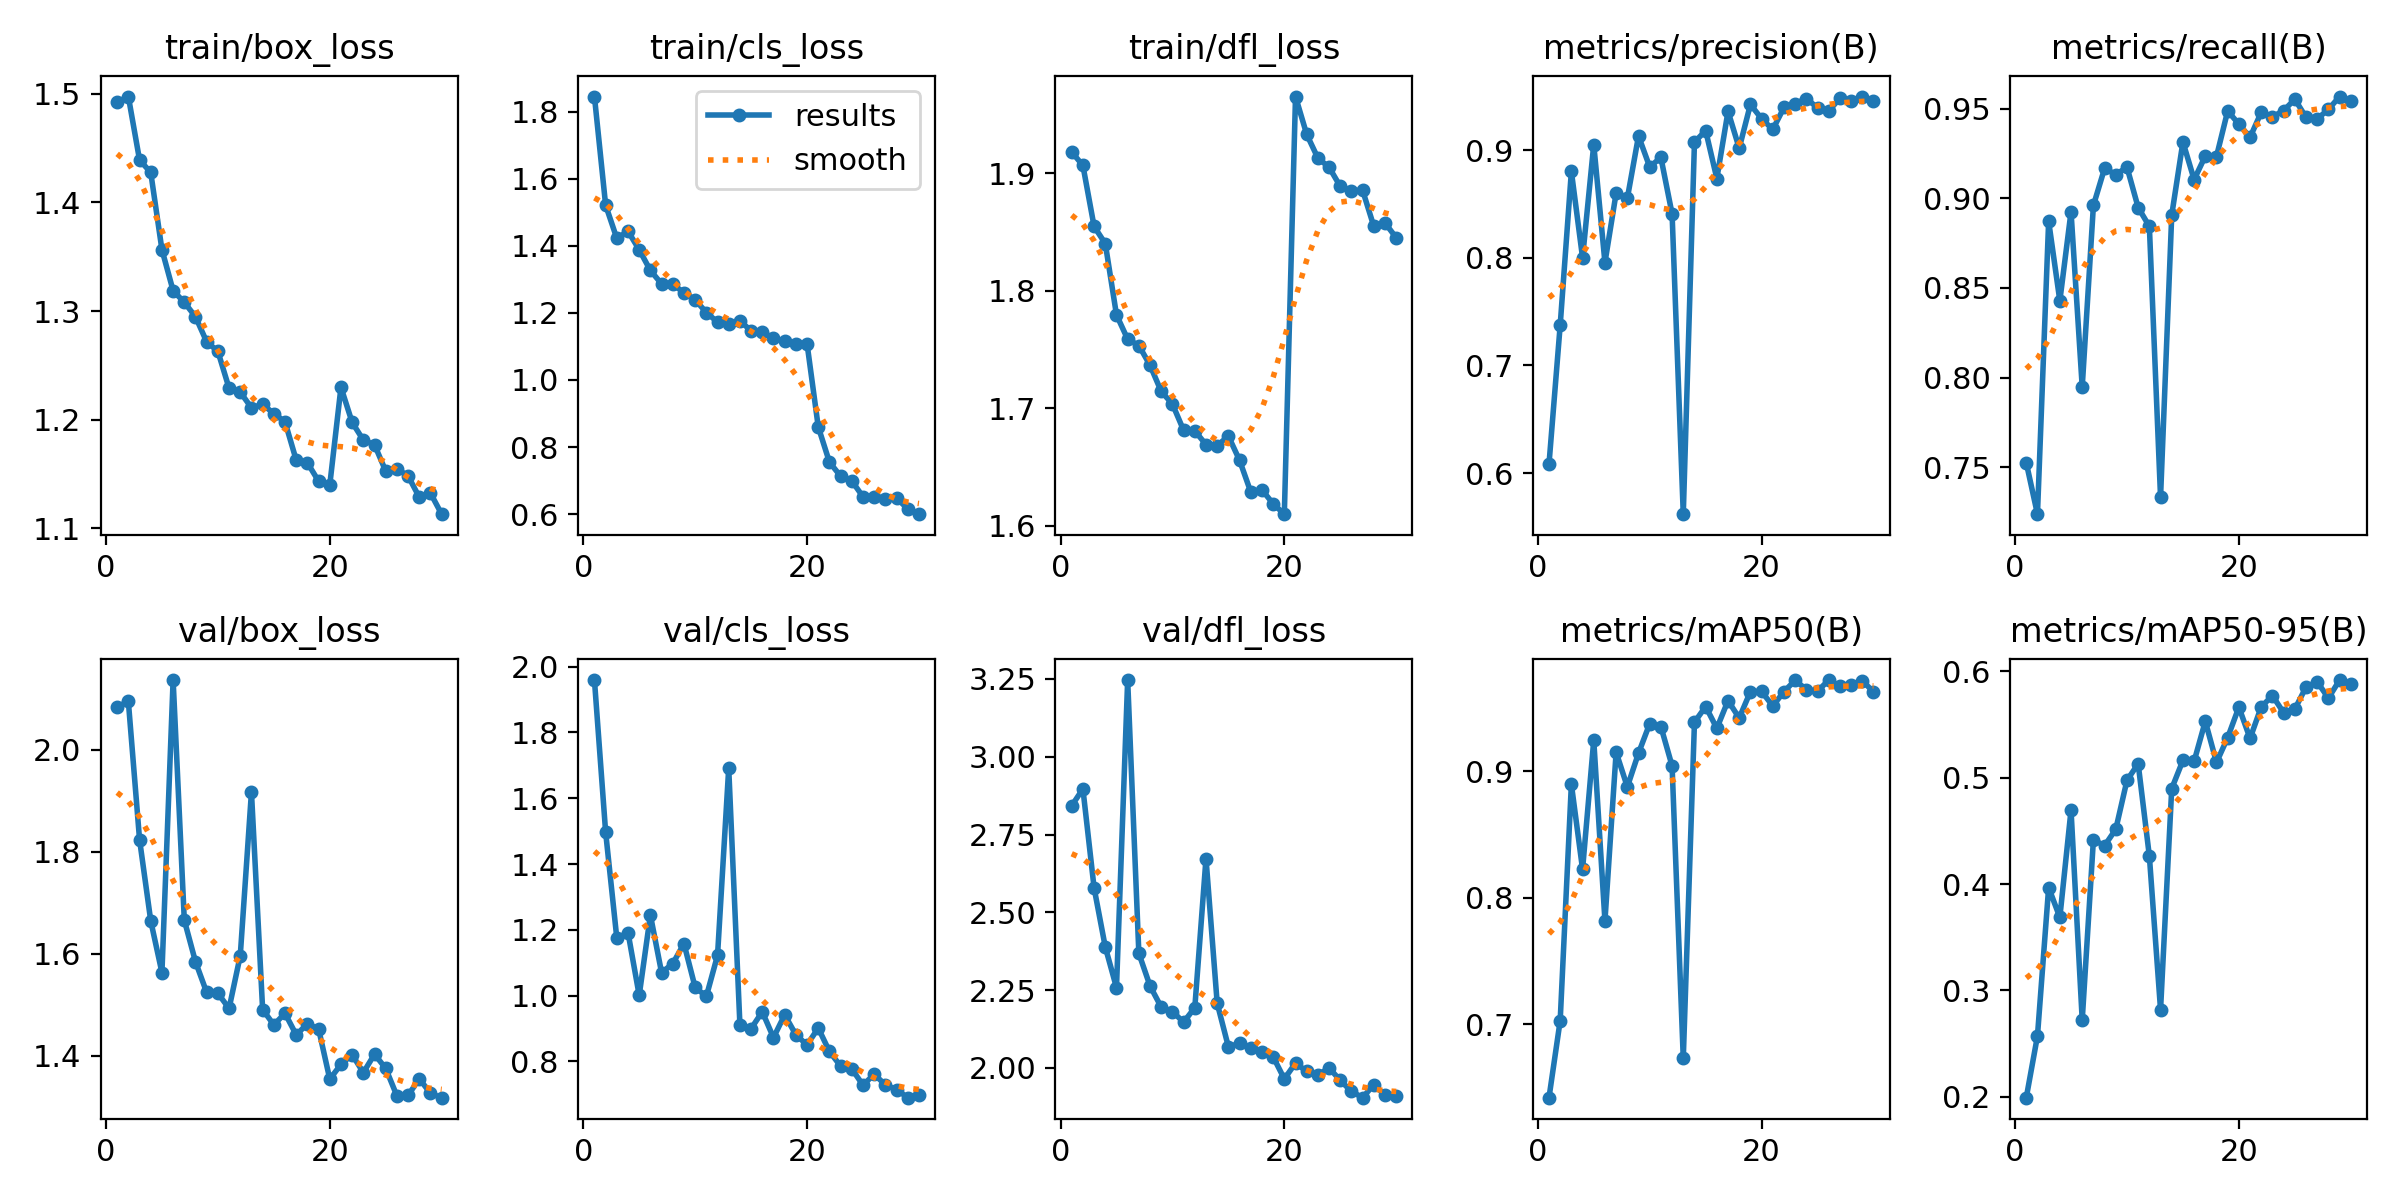

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_30epoch/results.png'
img = Image.open(image_path)
# Display the image using IPython.display
display(img)

A Random Image from Train Batch:


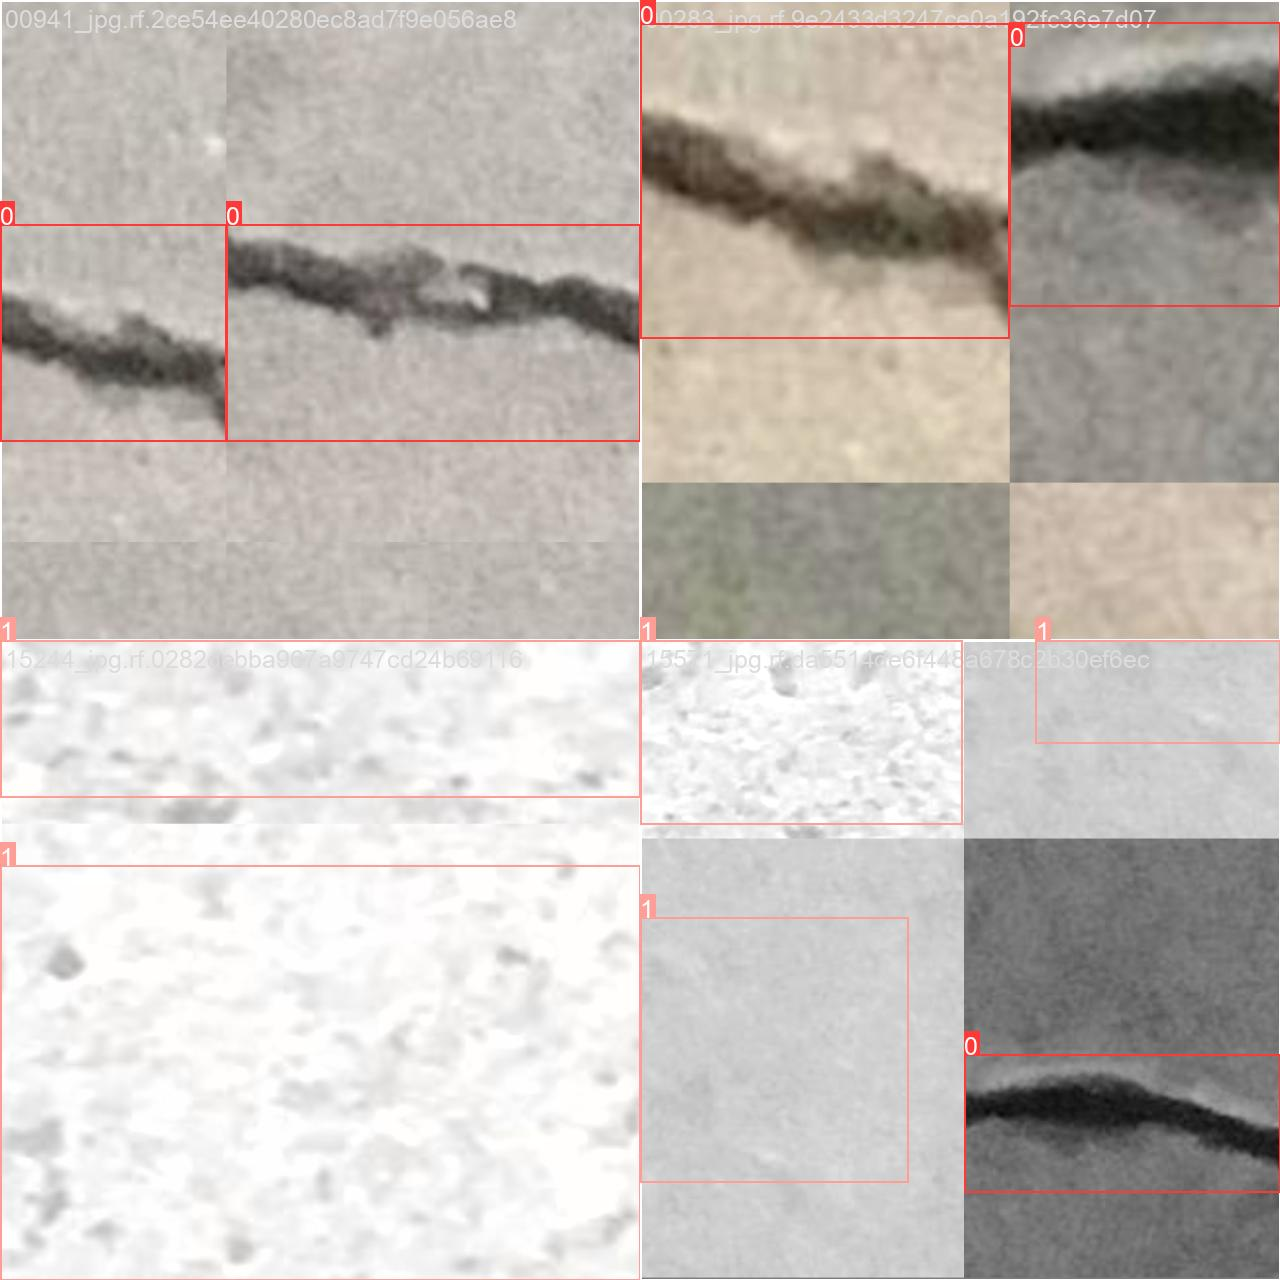

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_30epoch/train_batch1.jpg'
img = Image.open(image_path)
print("A Random Image from Train Batch:")
# Display the image using IPython.display
display(img)

A Random Image from Validatiob Batch with Label:


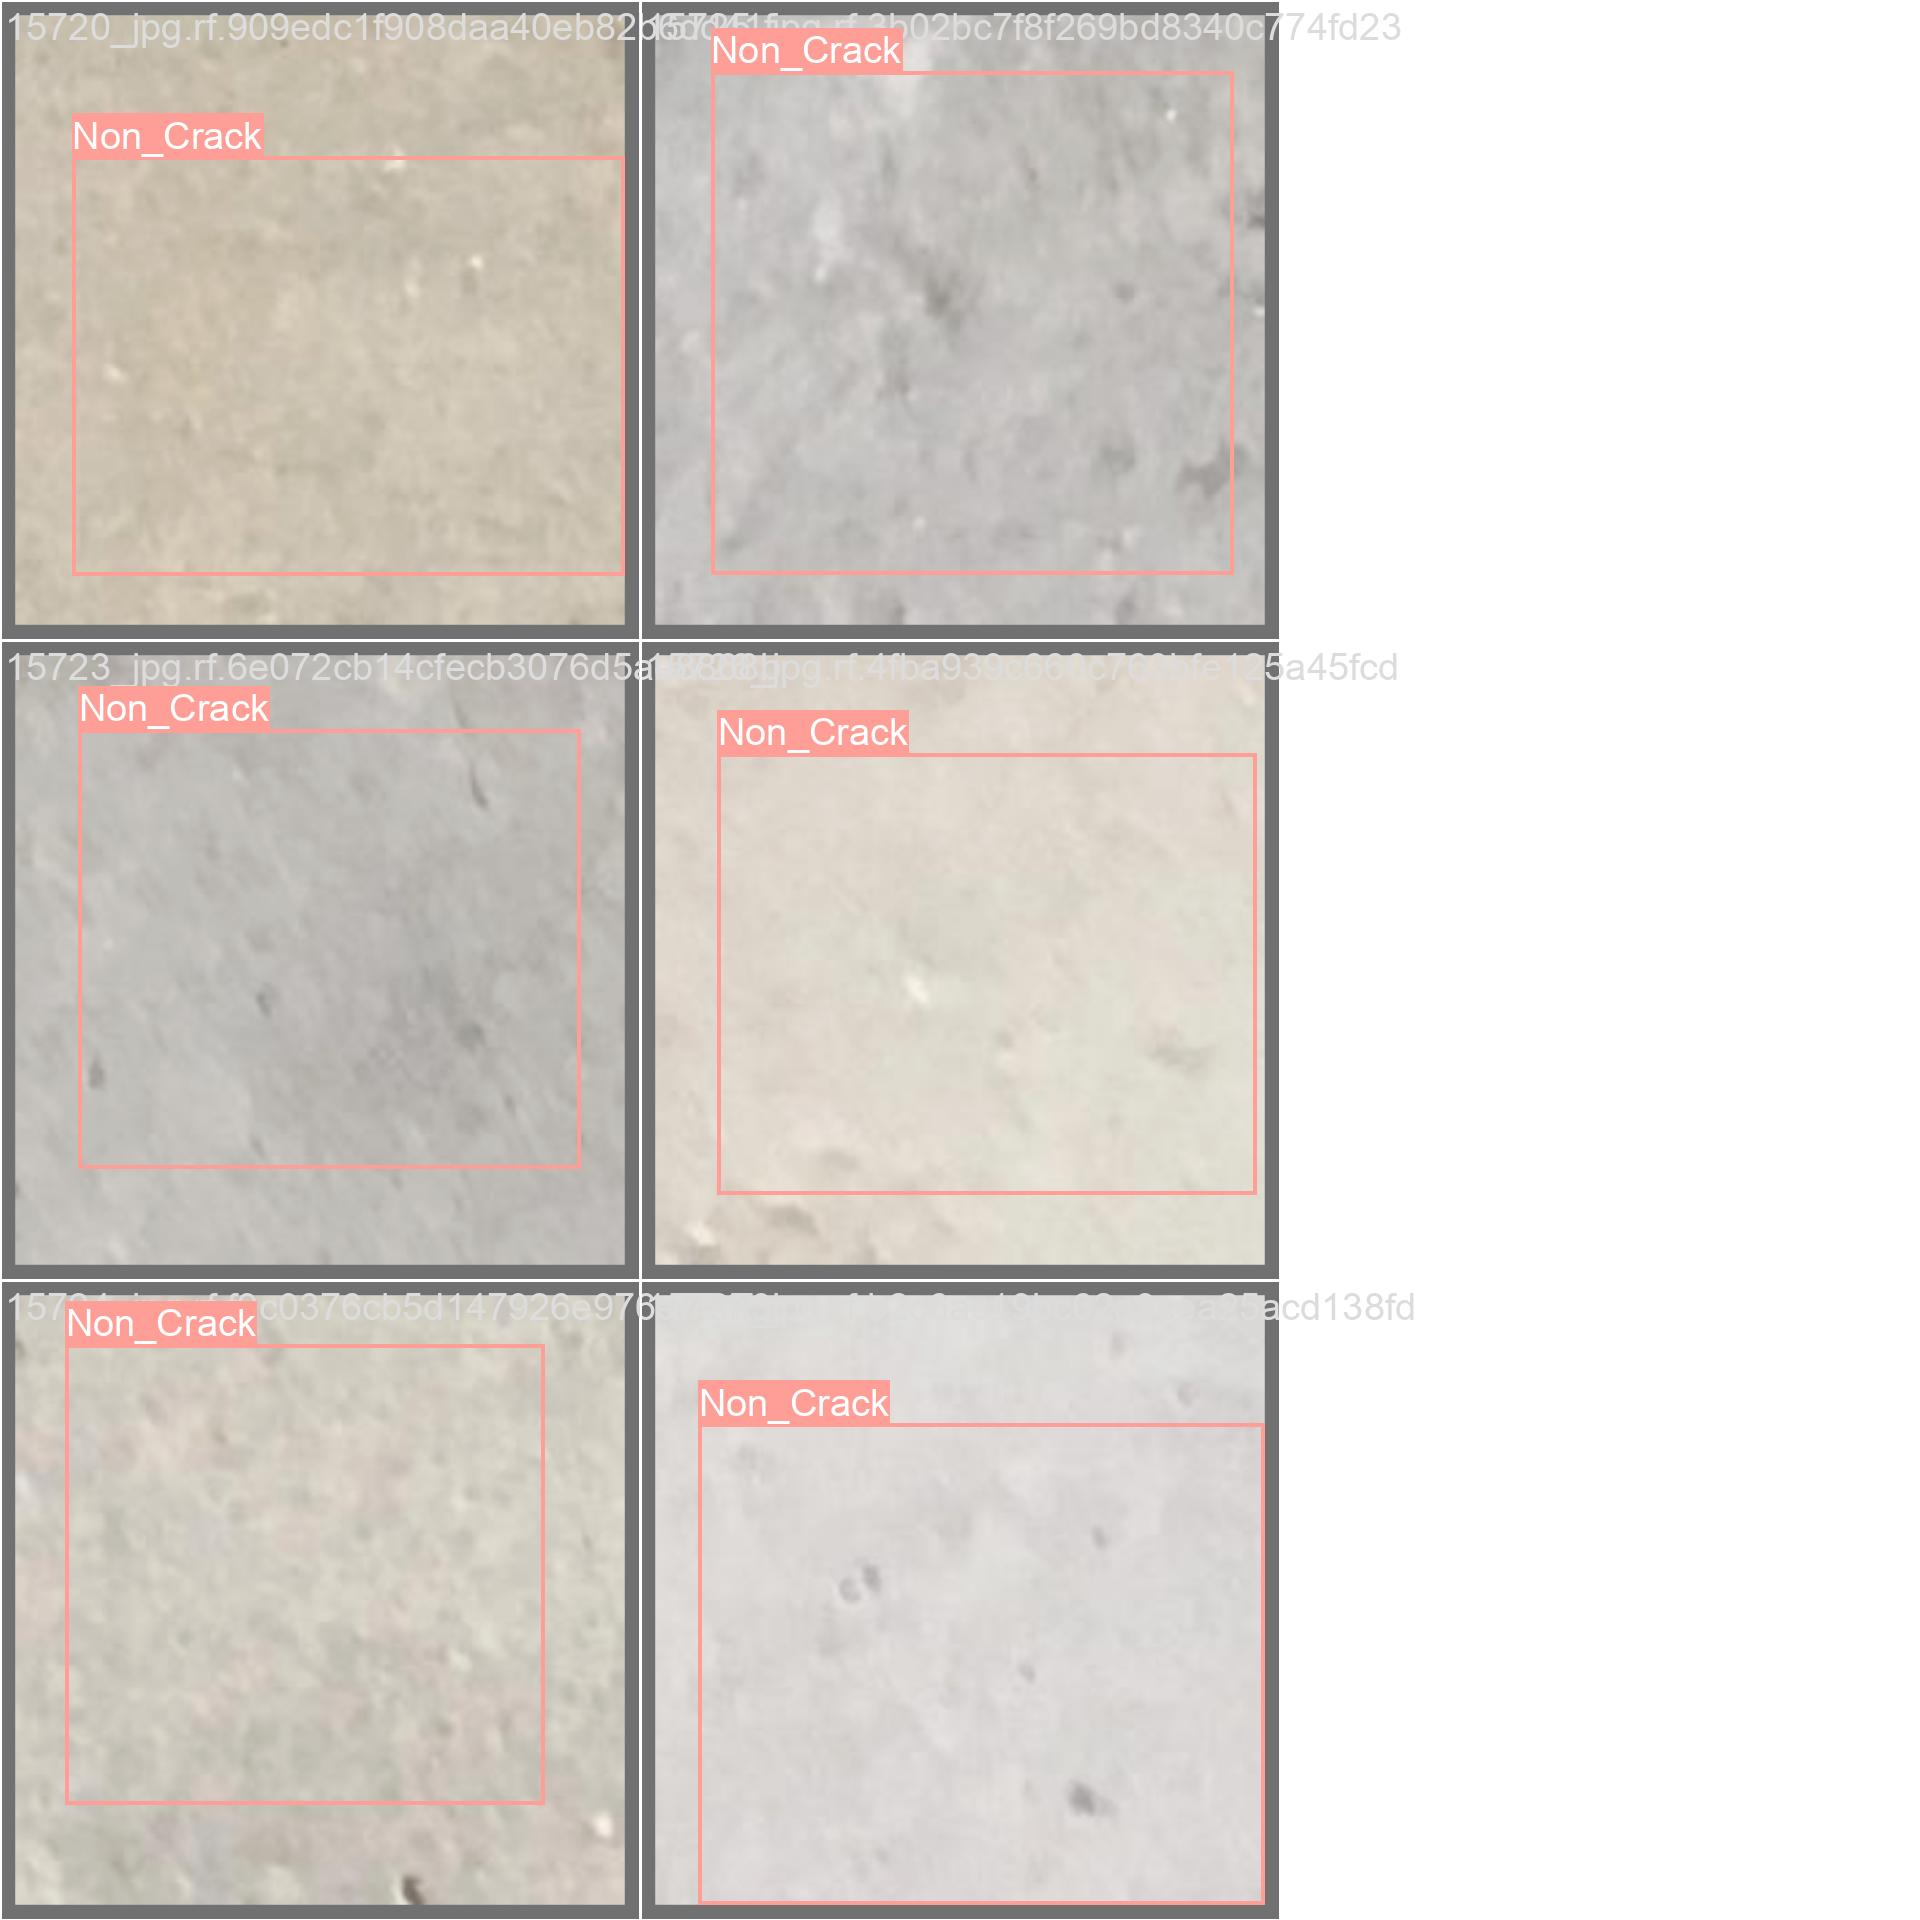

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/val_batch2_labels.jpg'
img = Image.open(image_path)
print("A Random Image from Validatiob Batch with Label:")
# Display the image using IPython.display
display(img)

A Random Image from Validation Batch with Prediction:


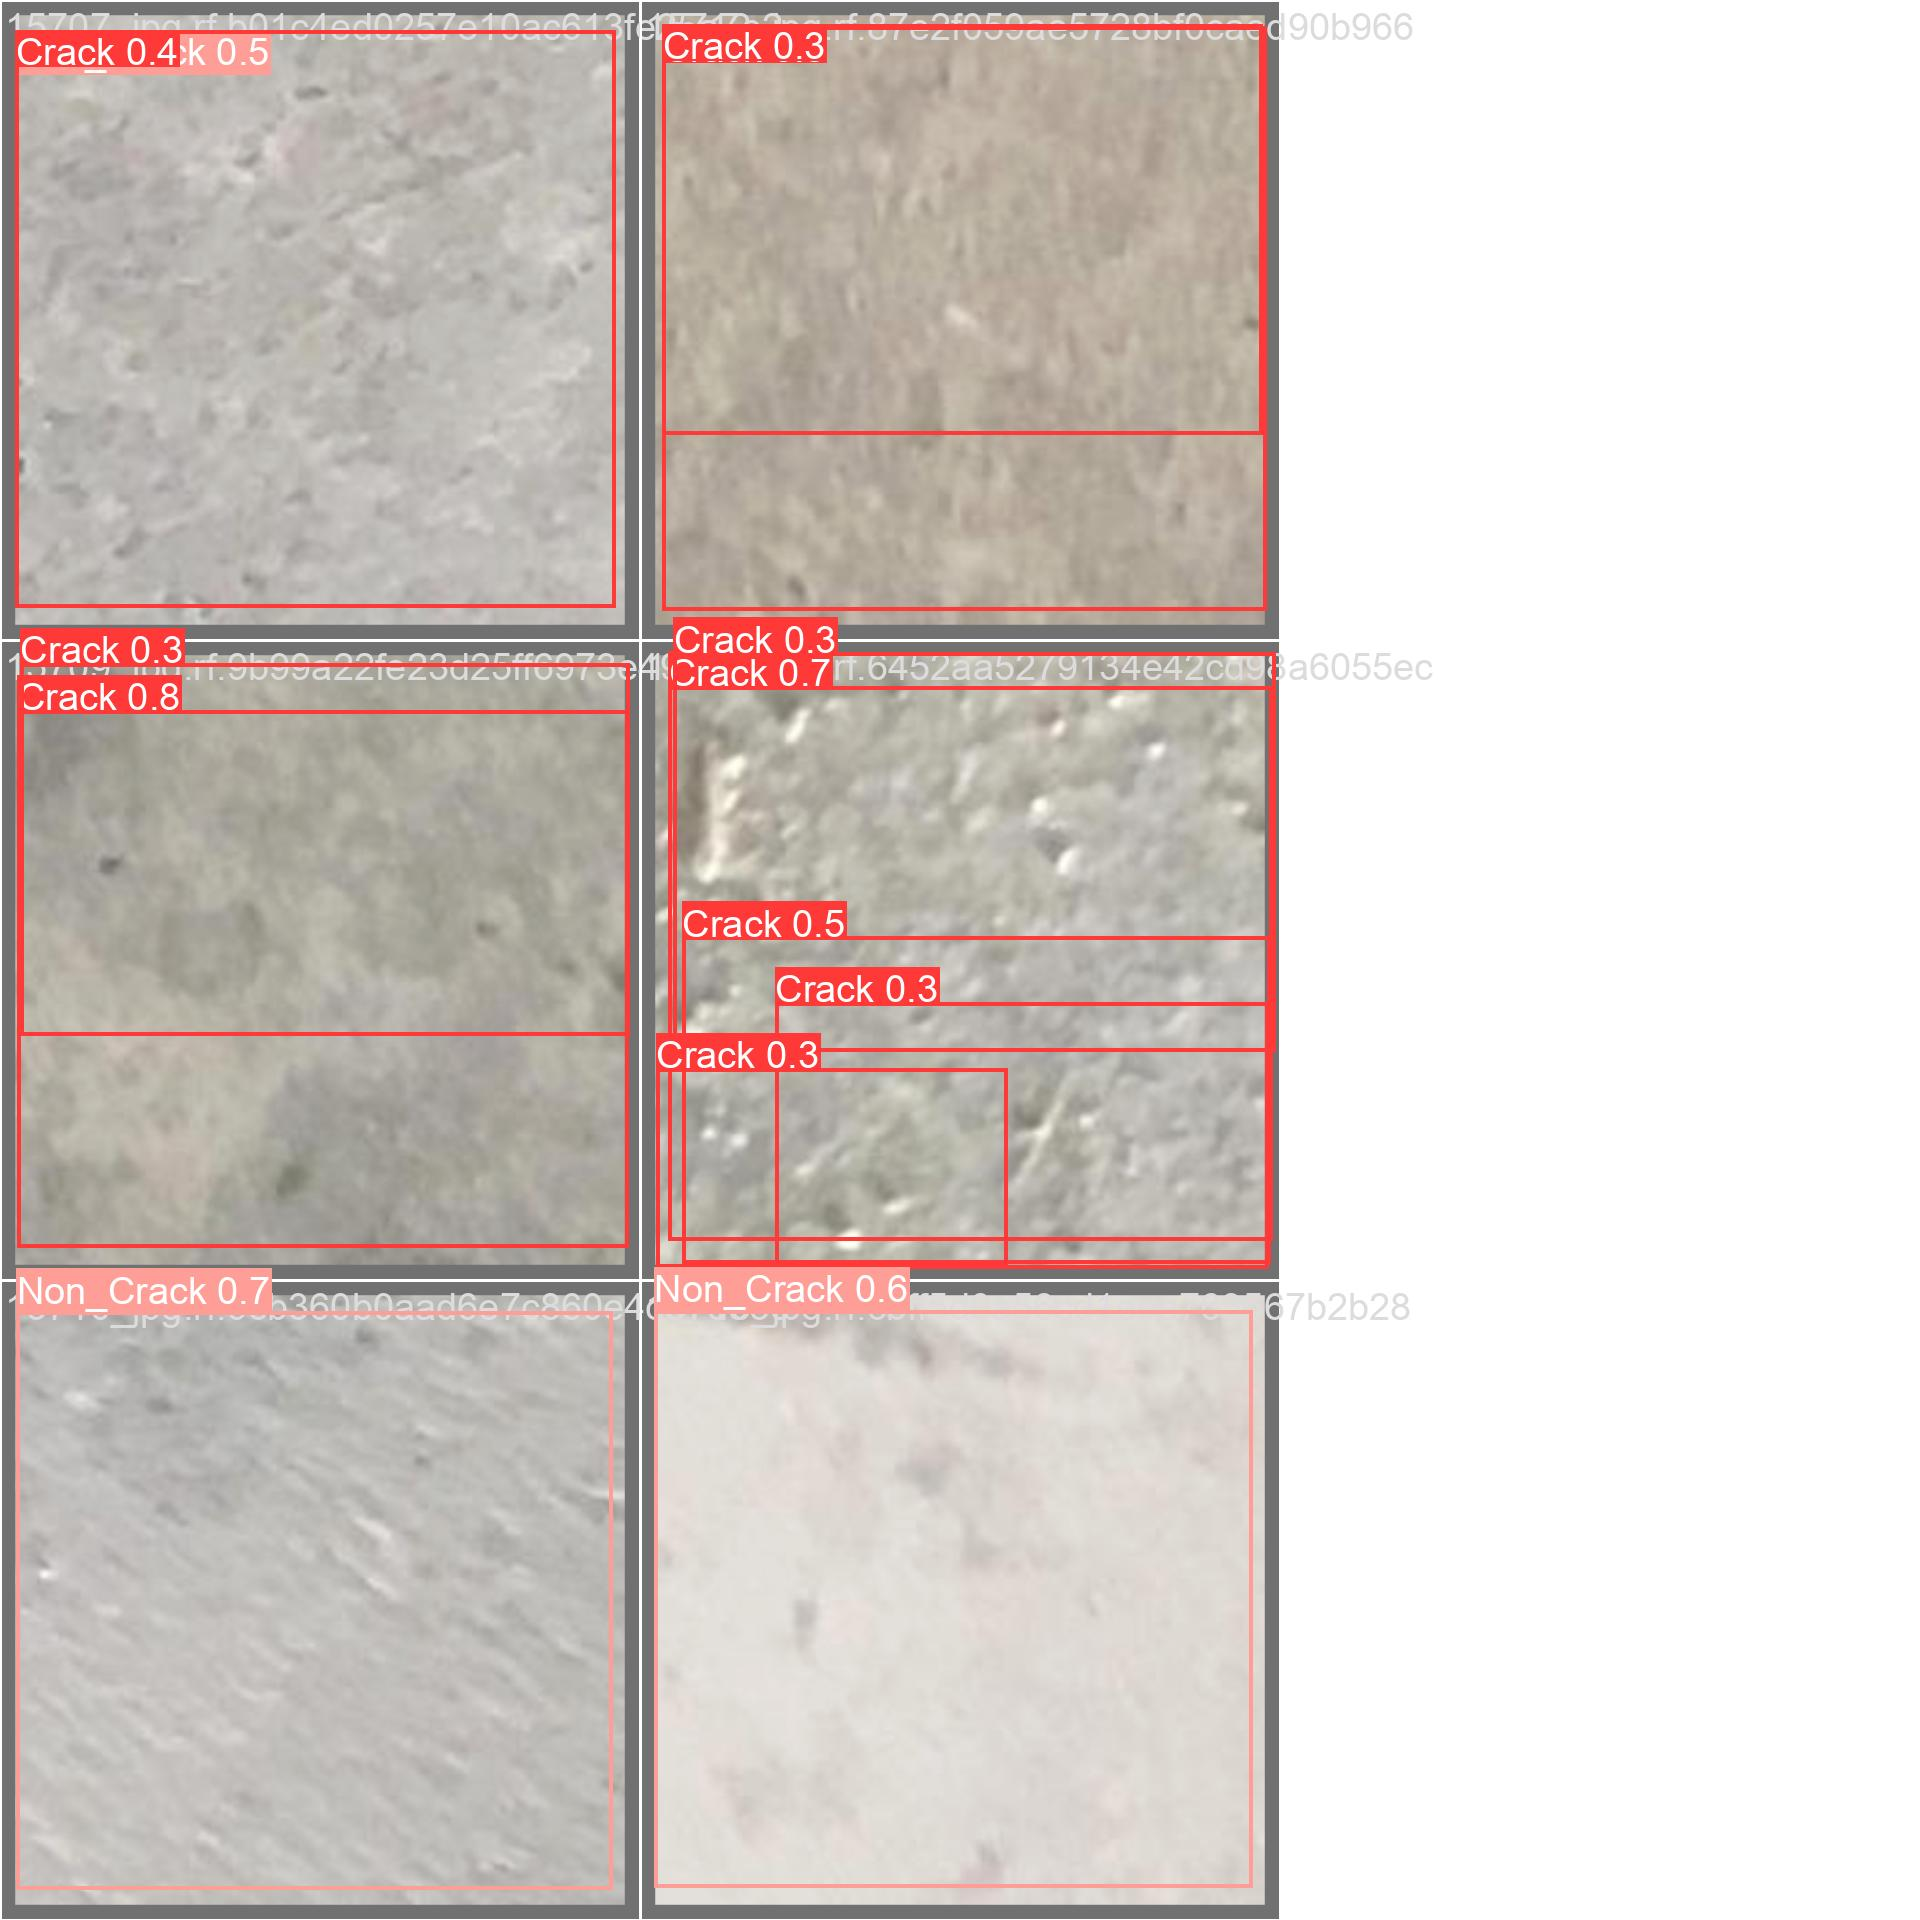

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/training_results/result_2epoch2/val_batch1_pred.jpg'
img = Image.open(image_path)
print("A Random Image from Validation Batch with Prediction:")
# Display the image using IPython.display
display(img)

Testing Result:


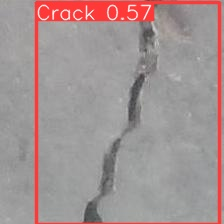

In [ ]:
from PIL import Image
from IPython.display import display

# Load the PNG image using Image.open() from PIL
# Replace 'your_image.png' with the path to your PNG image file
image_path = '/content/drive/MyDrive/yolov8/output/00005_jpg.rf.9f43b17a934d97c72d07d4ca38e167c5 (1).jpg'
img = Image.open(image_path)
print("Testing Result:")
# Display the image using IPython.display
display(img)